## MLP Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = 'data/002_intermediate_data/preprocessed_data.csv'
data = pd.read_csv(file, encoding='latin-1')
print('shape:', data.shape)
data.head(3)

shape: (173, 16)


,id,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,mellow
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,hip hop
2,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73,barbadian pop


## General dataset analysis

In [3]:
# Randomize data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,id,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,293,Don't,Ed Sheeran,pop,2015,95,61,81,-7,64,85,220,1,7,74,pop
1,142,Story of My Life,One Direction,boy band,2013,121,66,60,-6,12,29,245,23,5,81,band
2,477,"How Far I'll Go - From ""Moana""",Alessia Cara,canadian contemporary r&b,2017,181,54,31,-10,7,16,176,16,35,71,r&b
3,570,...Ready For It? - BloodPop® Remix,Taylor Swift,pop,2018,160,84,58,-5,10,50,190,13,22,52,pop
4,462,Despacito - Remix,Luis Fonsi,latin,2017,178,82,65,-4,10,82,229,23,17,76,latin


In [4]:
# General statistics
data.describe()
# asks for scaler! means and ranges are different

,id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,328.566474,2015.023121,118.722543,68.595376,61.716763,-5.924855,16.040462,48.254335,221.791908,17.716763,8.312139,67.641618
std,165.035241,2.456491,28.721263,19.312256,14.111500,4.591463,12.727629,20.883231,34.057792,24.796043,7.544112,15.325875
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,211.000000,2014.000000,100.000000,59.000000,55.000000,-7.000000,8.000000,34.000000,199.000000,2.000000,4.000000,61.000000
50%,341.000000,2015.000000,120.000000,74.000000,62.000000,-5.000000,11.000000,47.000000,220.000000,7.000000,6.000000,71.000000
75%,454.000000,2017.000000,130.000000,82.000000,71.000000,-4.000000,17.000000,62.000000,240.000000,20.000000,9.000000,78.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,97.000000,329.000000,99.000000,44.000000,92.000000


In [5]:
# Verificando valores nulos
data.isna().sum()

id            0
title         0
artist        0
genre         0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
supergenre    0
dtype: int64

### Deleting not important data

In [6]:
data.columns

Index(['id', 'title', 'artist', 'genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop', 'supergenre'],
      dtype='object')

In [7]:
df = data.drop(['id', 'title', 'artist', 'genre'], axis=1)
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,2015,95,61,81,-7,64,85,220,1,7,74,pop
1,2013,121,66,60,-6,12,29,245,23,5,81,band
2,2017,181,54,31,-10,7,16,176,16,35,71,r&b
3,2018,160,84,58,-5,10,50,190,13,22,52,pop
4,2017,178,82,65,-4,10,82,229,23,17,76,latin


### LabelEncoder para variável `supergenre`

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
le.fit(df.supergenre)
df.supergenre = le.transform(df.supergenre)

#df.supergenre = le.fit_transform(df.supergenre)
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,2015,95,61,81,-7,64,85,220,1,7,74,12
1,2013,121,66,60,-6,12,29,245,23,5,81,0
2,2017,181,54,31,-10,7,16,176,16,35,71,13
3,2018,160,84,58,-5,10,50,190,13,22,52,12
4,2017,178,82,65,-4,10,82,229,23,17,76,10


## Análise de correlação

In [10]:
df_corr = df.corr()
df_corr

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
year,1.000000,-0.065420,-0.253118,0.092939,-0.156859,-0.060094,-0.096676,-0.225168,0.036856,-0.012313,0.234028,0.069830
bpm,-0.065420,1.000000,0.054281,-0.021856,0.322660,0.010941,-0.000938,-0.099663,0.008747,0.105397,0.126941,0.022780
nrgy,-0.253118,0.054281,1.000000,0.198428,0.546717,0.198849,0.429648,-0.119947,-0.621037,0.125855,-0.034004,-0.200177
dnce,0.092939,-0.021856,0.198428,1.000000,0.307842,-0.108766,0.446590,-0.177382,-0.189931,-0.026853,0.181309,-0.041603
dB,-0.156859,0.322660,0.546717,0.307842,1.000000,0.111673,0.309583,-0.068161,-0.103426,0.046316,0.280721,-0.191019
live,-0.060094,0.010941,0.198849,-0.108766,0.111673,1.000000,-0.012245,0.149367,-0.049925,0.136832,0.020194,0.032766
val,-0.096676,-0.000938,0.429648,0.446590,0.309583,-0.012245,1.000000,-0.199545,-0.149492,0.168990,0.028770,-0.238749
dur,-0.225168,-0.099663,-0.119947,-0.177382,-0.068161,0.149367,-0.199545,1.000000,0.124064,0.136656,-0.090756,0.121234
acous,0.036856,0.008747,-0.621037,-0.189931,-0.103426,-0.049925,-0.149492,0.124064,1.000000,-0.060690,0.059780,0.127451
spch,-0.012313,0.105397,0.125855,-0.026853,0.046316,0.136832,0.168990,0.136656,-0.060690,1.000000,0.031898,-0.029684


<AxesSubplot:>

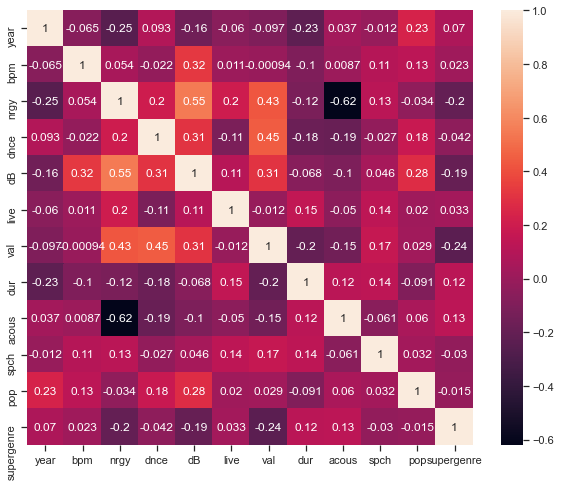

In [209]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=True)

**Análise da correlação:**

* Aparentemente, algumas variáveis tem correlação muito baixa com a variável `target` (supergenre).
* Pode ser que elas não influenciem tanto na determinação da variável.
* Porém, vale testar as duas alternativas:
  * com todas as variáveis
  * sem as variáveis de menor correlação (menor que 0.01 ou que 0.05)

## Train-test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('supergenre', axis=1)
y = df.supergenre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
f'{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}'

'(121, 11), (52, 11), (121,), (52,)'

In [15]:
X_train.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
91,2015,120,82,57,-3,16,66,211,6,3,52
2,2017,181,54,31,-10,7,16,176,16,35,71
125,2016,122,78,60,-5,19,53,208,16,5,52
131,2019,94,50,80,-6,6,87,183,11,7,87
69,2016,112,67,76,-7,16,38,251,2,10,78


## Normalization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Fit scaler
scaler = StandardScaler()
scaler.fit(X_train)  # apply training data fitted scaler to both train and test data

# Transform data
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [18]:
np.mean(x_train).round(2), np.std(x_train)

(0.0, 1.0)

In [19]:
x_train[:5, :5]

array([[ 0.05092094,  0.0234791 ,  0.64283166, -0.35978744,  1.23198534],
       [ 0.87244552,  2.16297542, -0.83672925, -2.30128195, -2.14501008],
       [ 0.46168323,  0.09362652,  0.43146581, -0.13576885,  0.26712951],
       [ 1.69397009, -0.88843737, -1.04809509,  1.35768847, -0.21529841],
       [ 0.46168323, -0.25711059, -0.14979026,  1.058997  , -0.69772633]])

## MLP Classifier

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
model = MLPClassifier(hidden_layer_sizes=(3000, 1000, 1000),
                      activation='relu',
                      solver='adam',
                      verbose=False,
                      max_iter=2000)

In [54]:
model = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 50, 50, 50),
                      activation='relu',
                      solver='adam',
                      verbose=False,
                      max_iter=2000)

In [161]:
model = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50),
                      activation='relu',
                      solver='sgd',
                      alpha=0.01,
                      learning_rate='constant',
                      learning_rate_init=0.05,
                      verbose=False,
                      max_iter=2000)

In [162]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.28846153846153844

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.11      0.25      0.15         4
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       1.00      0.33      0.50         3
           7       0.36      0.80      0.50         5
           8       0.17      0.25      0.20         4
           9       0.50      0.50      0.50         2
          10       0.00      0.00      0.00         2
          11       0.20      1.00      0.33         1
          12       0.00      0.00      0.00         3
          13       0.33      0.33      0.33         3
          14       0.00      0.00      0.00         4
          15       1.00      0.17      0.29         6

    accuracy                           0.29        52
   macro avg       0.35   

<AxesSubplot:>

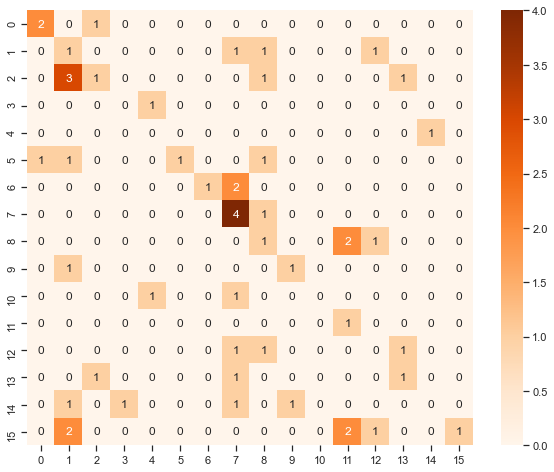

In [199]:
# Confusion Matrix
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap=plt.cm.Oranges)

In [212]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Oranges):
    matriz_confusao = np.zeros((20,20))
    if not title:
        if normalize:
            title = 'Matriz de confusão normalizada'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(9,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Rótulo verdadeiro',
           xlabel='Rótulo previsto')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            matriz_confusao[i,j] = cm[i, j]
    fig.tight_layout()
    return fig,ax,matriz_confusao

Matriz de confusão normalizada


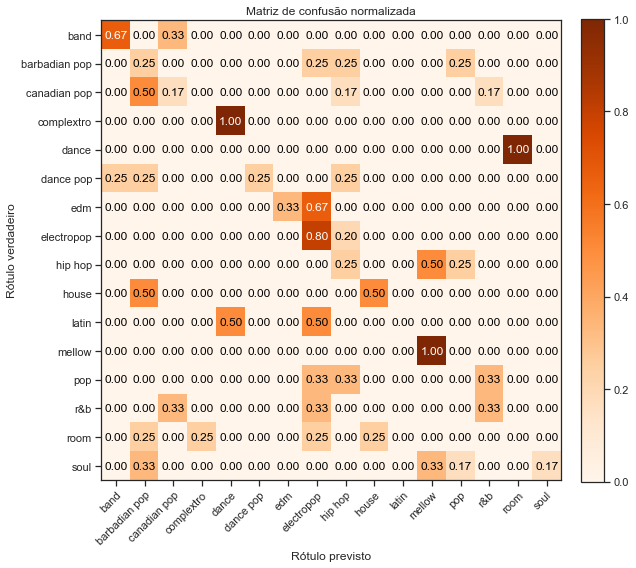

In [213]:
np.set_printoptions(precision=2)
names_test = le.inverse_transform(y_test)

# Plot normalized confusion matrix
fig,ax,matriz_confusao=plot_confusion_matrix(y_test,
                                             y_pred,
                                             classes=unique_labels(names_test),
                                             normalize=True)
plt.show()
#fig.savefig('matriz_confusao.png')

In [189]:
# comparando os rótulos previsto X realizado no dataset de TESTE
df_test_pred = pd.DataFrame({'test': ylabel_test, 'pred': ylabel_pred})
df_test_pred.head()

,test,pred
0,latin,dance
1,canadian pop,barbadian pop
2,pop,hip hop
3,electropop,electropop
4,room,electropop


In [192]:
# rótulos que tiveram alto valor de acurácia na classe
df_test_pred[df_test_pred.test.isin(['mellow', 'electropop'])]

,test,pred
3,electropop,electropop
12,mellow,mellow
19,electropop,electropop
20,electropop,electropop
34,electropop,electropop
38,electropop,hip hop


## Looking at correlation

In [58]:
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,2015,95,61,81,-7,64,85,220,1,7,74,12
1,2013,121,66,60,-6,12,29,245,23,5,81,0
2,2017,181,54,31,-10,7,16,176,16,35,71,13
3,2018,160,84,58,-5,10,50,190,13,22,52,12
4,2017,178,82,65,-4,10,82,229,23,17,76,10


In [65]:
df_corr.supergenre[abs(df_corr.supergenre) < 0.1]

year    0.069830
bpm     0.022780
dnce   -0.041603
live    0.032766
spch   -0.029684
pop    -0.015456
Name: supergenre, dtype: float64

In [68]:
df_corr.supergenre[abs(df_corr.supergenre) < 0.1].index

Index(['year', 'bpm', 'dnce', 'live', 'spch', 'pop'], dtype='object')

In [71]:
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,2015,95,61,81,-7,64,85,220,1,7,74,12
1,2013,121,66,60,-6,12,29,245,23,5,81,0
2,2017,181,54,31,-10,7,16,176,16,35,71,13
3,2018,160,84,58,-5,10,50,190,13,22,52,12
4,2017,178,82,65,-4,10,82,229,23,17,76,10


In [73]:
dcorr = df.drop(['year', 'bpm', 'dnce', 'live', 'spch', 'pop'], axis=1)
Xcorr = dcorr.drop('supergenre', axis=1)
ycorr = dcorr.supergenre

Xcorr.head(3)

,nrgy,dB,val,dur,acous
0,61,-7,85,220,1
1,66,-6,29,245,23
2,54,-10,16,176,16


In [77]:
#New training

# train test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xcorr, ycorr, test_size=0.3)

# Fit scaler
scaler = StandardScaler()
scaler.fit(Xc_train)  # apply training data fitted scaler to both train and test data

# Transform data
xc_train = scaler.transform(Xc_train)
xc_test = scaler.transform(Xc_test)

In [87]:
# Model creation
model = MLPClassifier(hidden_layer_sizes=(3000, ),
                      activation='relu',
                      solver='adam',
                      verbose=False,
                      max_iter=2000)

# Model fitting
model.fit(xc_train, yc_train)

# Model predictions
yc_pred = model.predict(xc_test)
accuracy_score(yc_test, yc_pred)

0.17307692307692307

## Programatic approach

In [122]:
def run_classifier(layers, activation, xc_train, yc_train, xc_test, yc_test):
    # Model creation
    model = MLPClassifier(hidden_layer_sizes=layers,
                          activation=activation,
                          solver='adam',
                          verbose=False,
                          max_iter=2000)

    # Model fitting
    model.fit(xc_train, yc_train)

    # Model predictions
    yc_pred = model.predict(xc_test)
    
    return {'acc': accuracy_score(yc_test, yc_pred),
            'model': model}

In [123]:
run_classifier((100, 40), 'relu', xc_train, yc_train, xc_test, yc_test)

{'acc': 0.19230769230769232,
 'model': MLPClassifier(hidden_layer_sizes=(100, 40), max_iter=2000)}

In [95]:
def build_layers(nlayers, sizes):
    all_layers = []
    
    for n in nlayers:
        for size in sizes:
            all_layers.append(tuple([size]*n))
    
    return all_layers

In [99]:
nlayers = [1, 2, 3, 4, 5]
layer_size = [30, 40, 50, 100]

hidden_layers = build_layers(nlayers, layer_size)
print(f'len: {len(hidden_layers)}')
print(hidden_layers)

len: 20
[(30,), (40,), (50,), (100,), (30, 30), (40, 40), (50, 50), (100, 100), (30, 30, 30), (40, 40, 40), (50, 50, 50), (100, 100, 100), (30, 30, 30, 30), (40, 40, 40, 40), (50, 50, 50, 50), (100, 100, 100, 100), (30, 30, 30, 30, 30), (40, 40, 40, 40, 40), (50, 50, 50, 50, 50), (100, 100, 100, 100, 100)]


In [127]:
actv_func = {'logistic', 'tanh', 'relu'}  # 'identity'
all_models = []
for func in actv_func:
    for hidden in hidden_layers:
        all_models.append(run_classifier(hidden, func, xc_train, yc_train, xc_test, yc_test))

In [128]:
all_models

[{'acc': 0.19230769230769232,
  'model': MLPClassifier(hidden_layer_sizes=(30,), max_iter=2000)},
 {'acc': 0.15384615384615385,
  'model': MLPClassifier(hidden_layer_sizes=(40,), max_iter=2000)},
 {'acc': 0.1346153846153846,
  'model': MLPClassifier(hidden_layer_sizes=(50,), max_iter=2000)},
 {'acc': 0.15384615384615385, 'model': MLPClassifier(max_iter=2000)},
 {'acc': 0.1346153846153846,
  'model': MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=2000)},
 {'acc': 0.15384615384615385,
  'model': MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=2000)},
 {'acc': 0.15384615384615385,
  'model': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=2000)},
 {'acc': 0.15384615384615385,
  'model': MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=2000)},
 {'acc': 0.09615384615384616,
  'model': MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=2000)},
 {'acc': 0.17307692307692307,
  'model': MLPClassifier(hidden_layer_sizes=(40, 40, 40), max_iter=2000)},
 {'acc': 0.17307692307

In [132]:
[model for model in all_models if model['acc']>0.18]

[{'acc': 0.19230769230769232,
  'model': MLPClassifier(hidden_layer_sizes=(30,), max_iter=2000)},
 {'acc': 0.19230769230769232,
  'model': MLPClassifier(hidden_layer_sizes=(40, 40, 40, 40, 40), max_iter=2000)}]

In [134]:
model0 = [model for model in all_models if model['acc']>0.18][0]['model']
model1 = [model for model in all_models if model['acc']>0.18][1]['model']

In [143]:
print(model0.activation, model1.activation)
print()
print(f'{model0.get_params()} \n\n{model1.get_params()}')

relu relu

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (40, 40, 40, 40, 40), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


## Hyper-parameter optimization

**How to improve my hyper-parameters?**

https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa